In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction

In [ ]:
df = pd.read_pickle('MetaMotion/02_outliers_removed_chauvenet.pkl')

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [ ]:
predictor_columns = list(df.columns[:6])

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyr_x        8984 non-null   float64
 4   gyr_y        8938 non-null   float64
 5   gyr_z        8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [ ]:
subset = df[df["set"] == 35]

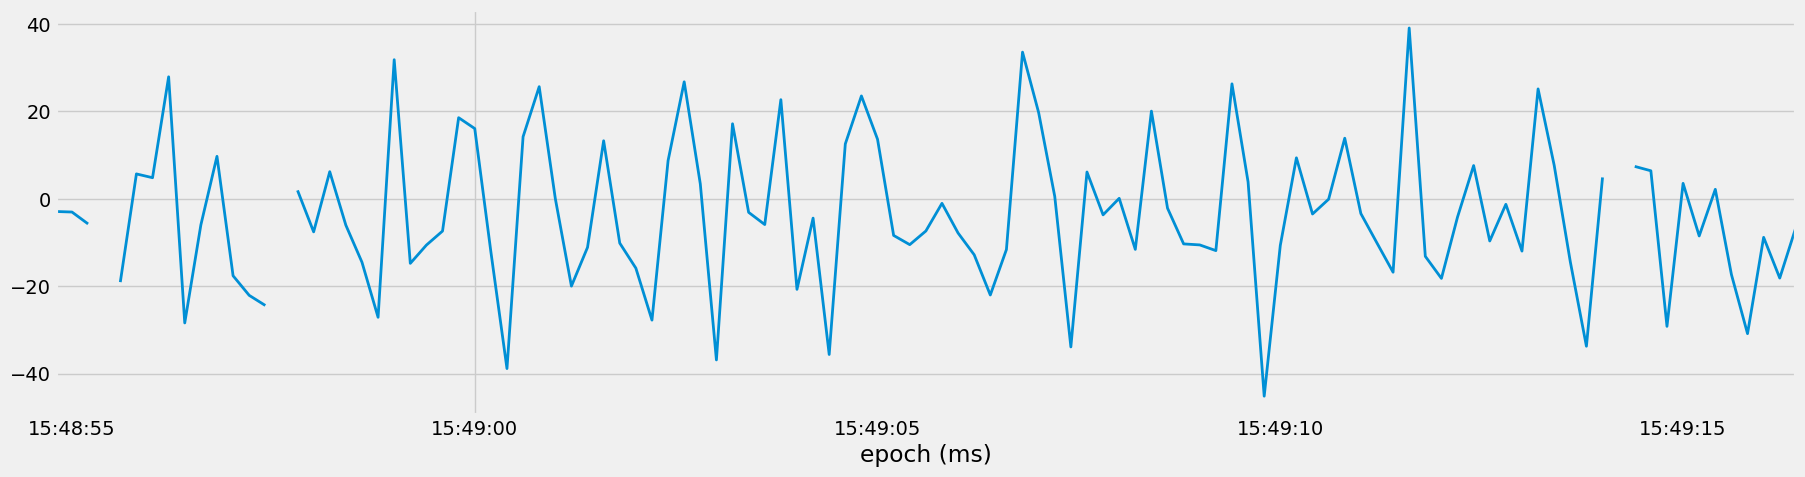

In [ ]:
subset = df[df["set"] == 35]["gyr_y"].plot()

In [ ]:
for col in predictor_columns:
    
    df[col] = df[col].interpolate()

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [ ]:
duration = df [df["set"] == 1].index[-1] -df[df["set"] ==1].index[0]
duration.seconds

16

In [ ]:
for s in df["set"].unique():

    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]

    duration = stop - start

    df.loc[(df["set"] == s),"duration"] = duration.seconds

In [ ]:
df.groupby(["category"])["duration"].mean()

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [ ]:
df_lowpass = df.copy()
LowPass = LowPassFilter()


fs = 1000 / 200
cutoff = 1.2

df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)


for col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]

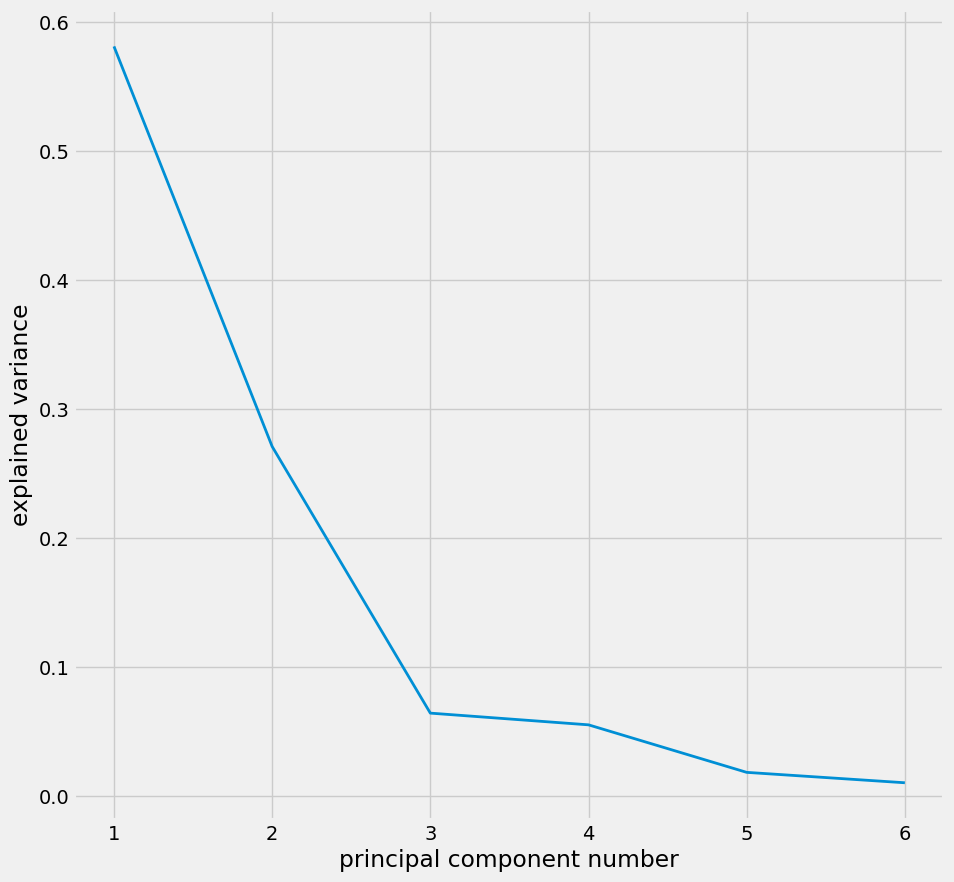

<Axes: xlabel='epoch (ms)'>

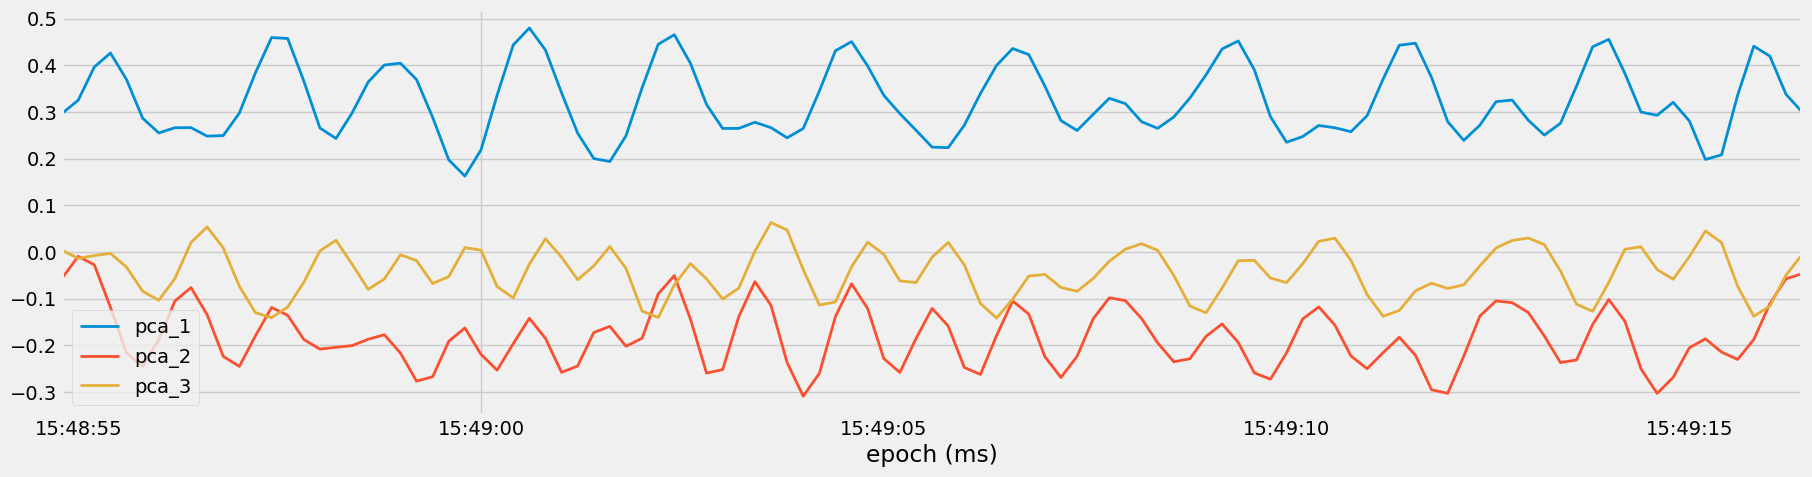

In [ ]:
df_pca = df_lowpass.copy()

PCA = PrincipalComponentAnalysis()

pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_columns)


plt.figure(figsize=(10, 10))
plt.plot(range(1, len(predictor_columns) + 1), pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()


df_pca = PCA.apply_pca(df_pca, predictor_columns, 3)


subset = df_pca[df_pca["set"] == 35]
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [ ]:
df_squared = df_pca.copy()

acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2 + df_squared["gyr_z"] ** 2

df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)

<Axes: xlabel='epoch (ms)'>

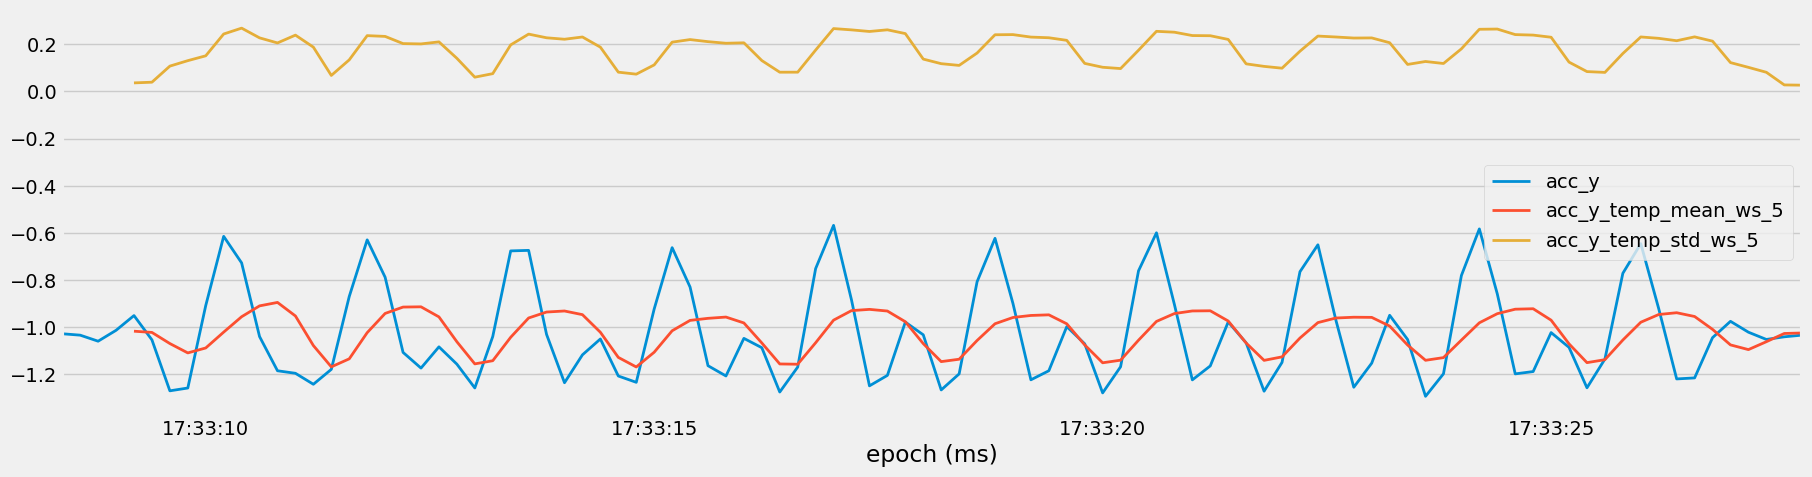

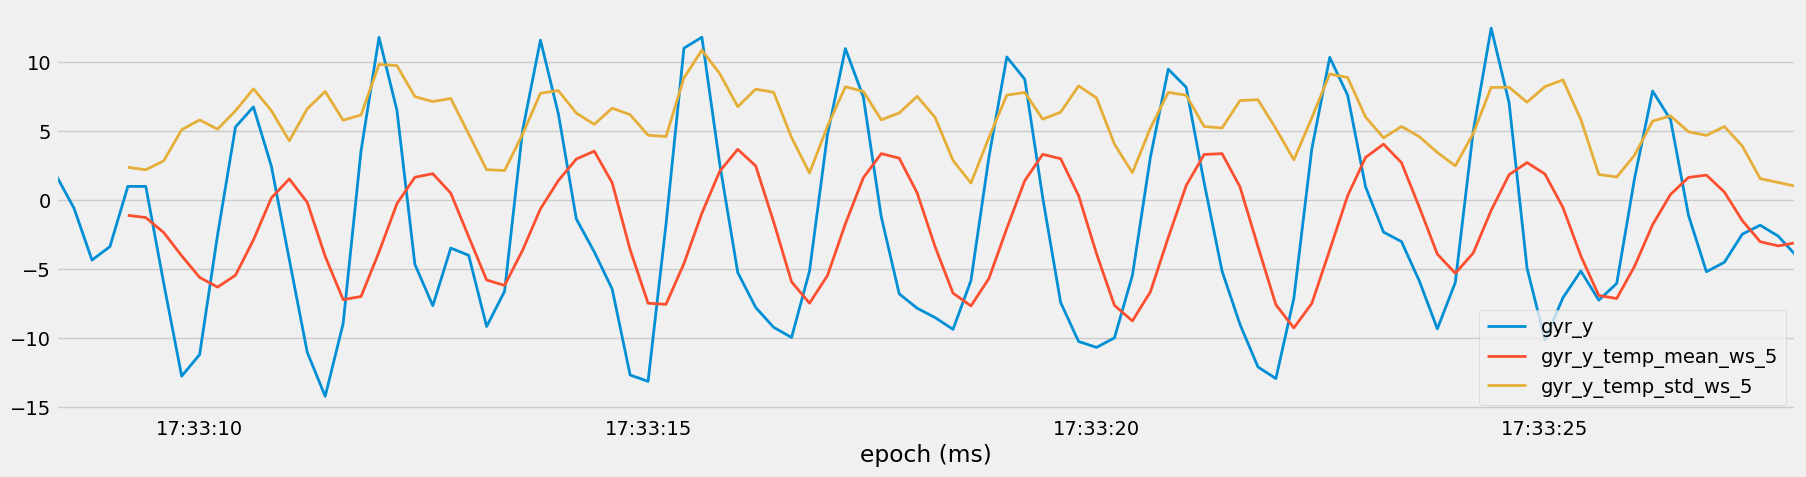

In [ ]:
df_temporal = df_squared.copy()
NumAbs = NumericalAbstraction()

predictor_columns = predictor_columns + ["acc_r", "gyr_r"]

ws = int(1000 / 200)

for col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "std")


df_temporal_list = []
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)


df_temporal = pd.concat(df_temporal_list)


subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()
subset[["gyr_y", "gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5"]].plot()

In [ ]:
from FrequencyAbstraction import FourierTransformation

In [ ]:
df_freq = df_temporal.copy().reset_index()
FreqAbs = FourierTransformation()

fs = int(1000 / 200)
ws = int(2800 / 200)

df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)

len(df_freq.columns)

44

In [ ]:
df_freq.columns

Index(['epoch (ms)', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'participant', 'label', 'category', 'set', 'duration', 'pca_1', 'pca_2',
       'pca_3', 'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5',
       'acc_x_temp_std_ws_5', 'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5',
       'acc_z_temp_mean_ws_5', 'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5',
       'gyr_x_temp_std_ws_5', 'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5',
       'gyr_z_temp_mean_ws_5', 'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5',
       'acc_r_temp_std_ws_5', 'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5',
       'acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse',
       'acc_y_freq_0.0_Hz_ws_14', 'acc_y_freq_0.357_Hz_ws_14',
       'acc_y_freq_0.714_Hz_ws_14', 'acc_y_freq_1.071_Hz_ws_14',
       'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_1.786_Hz_ws_14',
       'acc_y_freq_2.143_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14'],
      dtype='object')

In [ ]:
df_freq_list = []
for s in df["set"].unique():
    print(f"Applying fourier transformation to set {s}")
    subset = df_freq[df_freq["set"] == s].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, predictor_columns, ws, fs)
    df_freq_list.append(subset)

Applying fourier transformation to set 30
Applying fourier transformation to set 1
Applying fourier transformation to set 31
Applying fourier transformation to set 3
Applying fourier transformation to set 9
Applying fourier transformation to set 32
Applying fourier transformation to set 10
Applying fourier transformation to set 33
Applying fourier transformation to set 11
Applying fourier transformation to set 34
Applying fourier transformation to set 35
Applying fourier transformation to set 15
Applying fourier transformation to set 36
Applying fourier transformation to set 16
Applying fourier transformation to set 37
Applying fourier transformation to set 17
Applying fourier transformation to set 27
Applying fourier transformation to set 38
Applying fourier transformation to set 28
Applying fourier transformation to set 29
Applying fourier transformation to set 6
Applying fourier transformation to set 65
Applying fourier transformation to set 67
Applying fourier transformation to set

In [ ]:
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)",drop=True)

In [ ]:
df_freq.drop(columns= ['duration'])

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,-0.289293,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,90,...,0.509833,0.608660,304.825579,-41.572736,57.022041,78.579281,-21.898935,55.881245,14.102476,9.598016
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,90,...,0.625087,0.547018,266.538134,-67.414847,35.931545,37.829734,21.948169,22.258871,19.610711,29.452260


In [ ]:
df_freq = df_freq.dropna()

In [ ]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,-1.135436,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962
2019-01-11 15:08:08.200,-0.079459,0.865770,-0.099062,-19.623822,-7.725109,17.802498,B,bench,heavy,30,...,-0.934801,0.340976,252.215177,-22.433493,-19.033819,8.964550,-27.299208,-53.781176,12.732277,-6.323266
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,-0.217733,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355
2019-01-11 15:08:08.600,-0.035810,0.936473,-0.042505,3.220080,0.392786,-4.260762,B,bench,heavy,30,...,-0.208674,0.558612,255.960168,-39.886136,-71.934733,-23.127344,22.967531,34.012541,-23.505706,5.515086
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,-0.639241,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,-0.289293,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,90,...,0.509833,0.608660,304.825579,-41.572736,57.022041,78.579281,-21.898935,55.881245,14.102476,9.598016
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,90,...,0.625087,0.547018,266.538134,-67.414847,35.931545,37.829734,21.948169,22.258871,19.610711,29.452260


In [ ]:
df_freq.drop(columns= ['duration'],inplace = True)

In [ ]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,-1.135436,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962
2019-01-11 15:08:08.200,-0.079459,0.865770,-0.099062,-19.623822,-7.725109,17.802498,B,bench,heavy,30,...,-0.934801,0.340976,252.215177,-22.433493,-19.033819,8.964550,-27.299208,-53.781176,12.732277,-6.323266
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,-0.217733,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355
2019-01-11 15:08:08.600,-0.035810,0.936473,-0.042505,3.220080,0.392786,-4.260762,B,bench,heavy,30,...,-0.208674,0.558612,255.960168,-39.886136,-71.934733,-23.127344,22.967531,34.012541,-23.505706,5.515086
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,-0.639241,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,-0.289293,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,90,...,0.509833,0.608660,304.825579,-41.572736,57.022041,78.579281,-21.898935,55.881245,14.102476,9.598016
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,90,...,0.625087,0.547018,266.538134,-67.414847,35.931545,37.829734,21.948169,22.258871,19.610711,29.452260


In [ ]:
df_freq.iloc[::2]

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,-1.135436,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,-0.217733,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,-0.639241,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,heavy,30,...,0.479442,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,heavy,30,...,-0.431598,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,90,...,-1.224329,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,90,...,0.453873,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,-0.289293,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067


In [ ]:
df_freq = df_freq.iloc[::2]

In [ ]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2,10)
inertias = []

In [ ]:
df_cluster = df_freq.copy()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k,n_init= 20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

In [ ]:
inertias

[881.0178142132861,
 506.5977881278836,
 308.8268071219472,
 228.85350529307394,
 203.8798585015989,
 180.84283265994546,
 160.60468268392418,
 142.57157257880613]

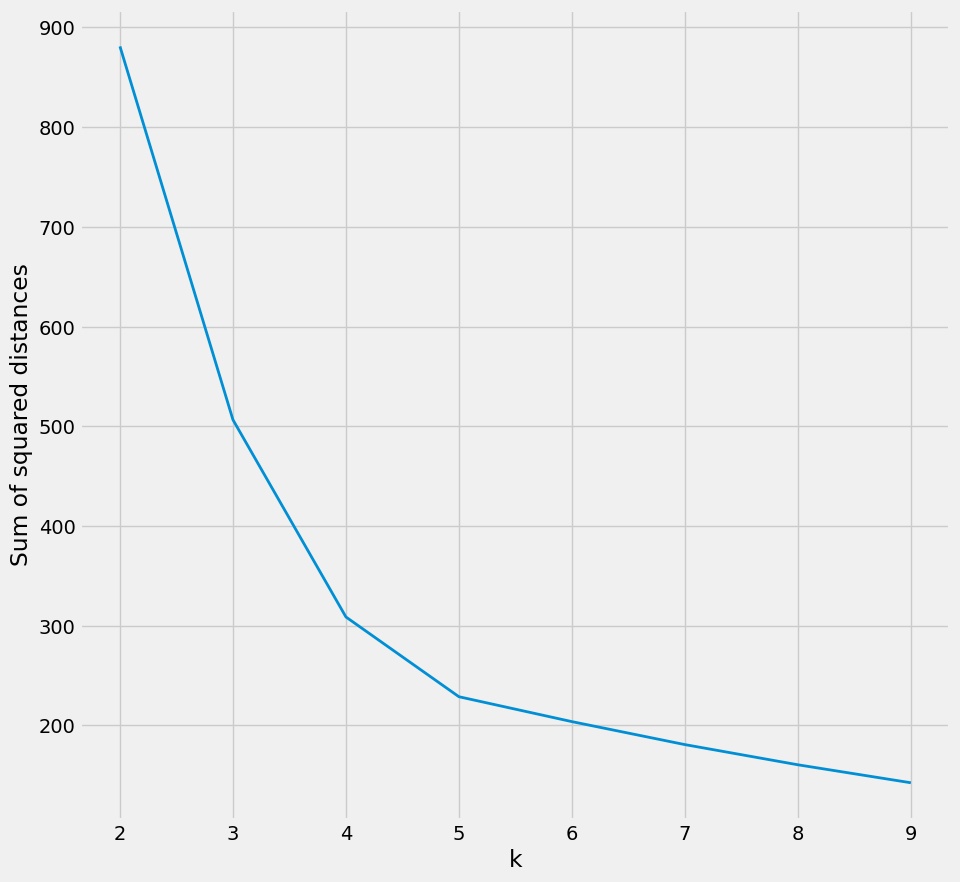

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(k_values,inertias)
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,n_init= 20, random_state=0)

In [ ]:
subset = df_cluster[cluster_columns]

In [ ]:
df_cluster["cluster"] = kmeans.fit_predict(subset)

In [ ]:
df_cluster

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,heavy,30,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,1
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,heavy,30,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,90,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,3
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,90,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,0
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,0


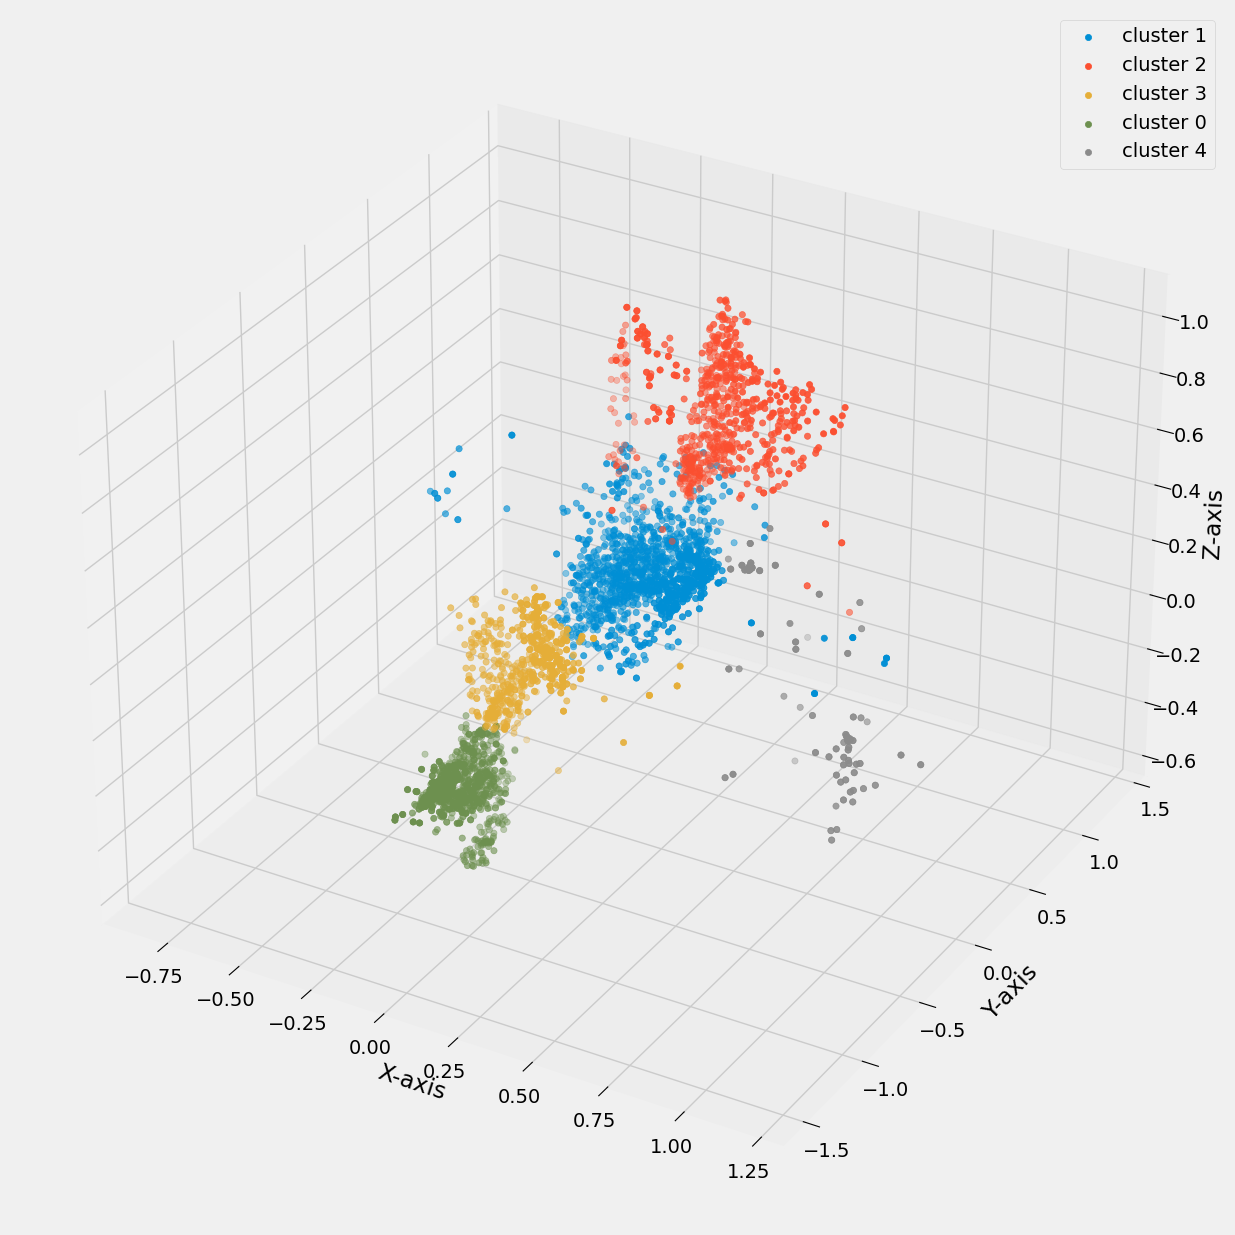

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection="3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=f"cluster {c}")

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

In [ ]:
df_cluster.to_pickle('MetaMotion/03_data_feaatures.pkl')